# Castles data

## Import libraries and styles for data visualization

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS
from stopwords import get_stopwords

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

## High-level descriptive information

Load the dataset:

In [2]:
df = pd.read_csv('data/castelli.csv', delimiter='|', encoding='ISO-8859-1')

Drop `DataOraModifica` column:

In [3]:
df = df.drop('DataOraModifica', axis=1)

Look at the first five and the last five rows in the dataset:

In [4]:
df.head()

,IdCastello,IdVeteroDb,IdRifVeteroDb,Castello,NumeroSullaCarta,EsistenzaDubbia,Toponimo,IdProvincia,Comune,Localita,...,DescrizioneSito,EdificioIsolato,ComplessoEdilizio,InsediamentoFortificato,AttPrecastrensi,CartografiaStorica,IconografiaStorica,RestauriInStile,CostruzioniNeomedievali,Note
0,258,Faenza-Oriolo,FA1,Oriolo,51.0,0,Oriolo,9,Faenza,Oriolo,...,NaN,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,259,Brisighella-Baccagnano,FA1,Baccagnano,1.0,0,Baccagnano,9,Brisighella,Monte Castello,...,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,260,Brisighella-Boesimo,FA1,Boesimo,2.0,0,Boesimo,9,Brisighella,Castelvecchio,...,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,261,Brisighella-Brisighella,FA1,Brisighella,3.0,0,Brisighella,9,Brisighella,Brisighella,...,NaN,0,0,1,NaN,NaN,NaN,Restauri compiuti nel 1965.,NaN,NaN
4,262,Brisighella-Calamello,FA1,Calamello,4.0,0,Calamello,9,Brisighella,Purocielo,...,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,IdCastello,IdVeteroDb,IdRifVeteroDb,Castello,NumeroSullaCarta,EsistenzaDubbia,Toponimo,IdProvincia,Comune,Localita,...,DescrizioneSito,EdificioIsolato,ComplessoEdilizio,InsediamentoFortificato,AttPrecastrensi,CartografiaStorica,IconografiaStorica,RestauriInStile,CostruzioniNeomedievali,Note
1995,4096,Villa Minozzo-Monteorsaro,RE1,Monteorsaro,182.0,0,NaN,3,Villa Minozzo,Monteorsaro,...,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1996,4097,Villa Minozzo-Novellano,RE1,Novellano,183.0,1,NaN,3,Villa Minozzo,Novellano,...,NaN,1,0,0,Il luogo è citato in un documento del 1184 nel...,NaN,NaN,NaN,NaN,NaN
1997,4098,Villa Minozzo-Poiano,RE1,Poiano,184.0,0,NaN,3,Villa Minozzo,Poiano,...,NaN,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1998,4099,Villa Minozzo-Ripiola,RE1,Ripiola,185.0,0,Poggio Arpiolla/Ripiola,3,Villa Minozzo,Coriano,...,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1999,4100,Villa Minozzo-Sologno,RE1,Sologno,186.0,0,NaN,3,Villa Minozzo,Sologno,...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN


Get general information about the dataset, including the number of rows and columns, the columns' headings and datatypes:

In [6]:
df.shape

(2000, 28)

In [7]:
df.columns

Index(['IdCastello', 'IdVeteroDb', 'IdRifVeteroDb', 'Castello',
       'NumeroSullaCarta', 'EsistenzaDubbia', 'Toponimo', 'IdProvincia',
       'Comune', 'Localita', 'Localizzazione', 'RifCTR', 'RifIGM',
       'CondizioniAttuali', 'UsoAttuale', 'RifFotoAerea', 'Planimetria',
       'InterventiRicognitivi', 'DescrizioneSito', 'EdificioIsolato',
       'ComplessoEdilizio', 'InsediamentoFortificato', 'AttPrecastrensi',
       'CartografiaStorica', 'IconografiaStorica', 'RestauriInStile',
       'CostruzioniNeomedievali', 'Note'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IdCastello               2000 non-null   int64  
 1   IdVeteroDb               2000 non-null   object 
 2   IdRifVeteroDb            2000 non-null   object 
 3   Castello                 2000 non-null   object 
 4   NumeroSullaCarta         1895 non-null   float64
 5   EsistenzaDubbia          2000 non-null   int64  
 6   Toponimo                 809 non-null    object 
 7   IdProvincia              2000 non-null   int64  
 8   Comune                   2000 non-null   object 
 9   Localita                 1841 non-null   object 
 10  Localizzazione           1711 non-null   float64
 11  RifCTR                   316 non-null    object 
 12  RifIGM                   190 non-null    object 
 13  CondizioniAttuali        1215 non-null   float64
 14  UsoAttuale              

### Duplicated data

Check for duplicated values:

In [9]:
print(df.duplicated().sum())

0


In [10]:
df.nunique()

IdCastello                 2000
IdVeteroDb                 1994
IdRifVeteroDb                14
Castello                   1798
NumeroSullaCarta            373
EsistenzaDubbia               2
Toponimo                    646
IdProvincia                   9
Comune                      348
Localita                   1479
Localizzazione                4
RifCTR                       40
RifIGM                       39
CondizioniAttuali             5
UsoAttuale                  169
RifFotoAerea                  0
Planimetria                  48
InterventiRicognitivi        26
DescrizioneSito             116
EdificioIsolato               2
ComplessoEdilizio             2
InsediamentoFortificato       2
AttPrecastrensi              51
CartografiaStorica           26
IconografiaStorica           41
RestauriInStile              30
CostruzioniNeomedievali       9
Note                        379
dtype: int64

### Data sparsity

Check NULL data:

In [11]:
df.isnull().sum()

IdCastello                    0
IdVeteroDb                    0
IdRifVeteroDb                 0
Castello                      0
NumeroSullaCarta            105
EsistenzaDubbia               0
Toponimo                   1191
IdProvincia                   0
Comune                        0
Localita                    159
Localizzazione              289
RifCTR                     1684
RifIGM                     1810
CondizioniAttuali           785
UsoAttuale                 1657
RifFotoAerea               2000
Planimetria                1952
InterventiRicognitivi      1973
DescrizioneSito            1883
EdificioIsolato               0
ComplessoEdilizio             0
InsediamentoFortificato       0
AttPrecastrensi            1949
CartografiaStorica         1973
IconografiaStorica         1959
RestauriInStile            1970
CostruzioniNeomedievali    1990
Note                       1617
dtype: int64

<Axes: >

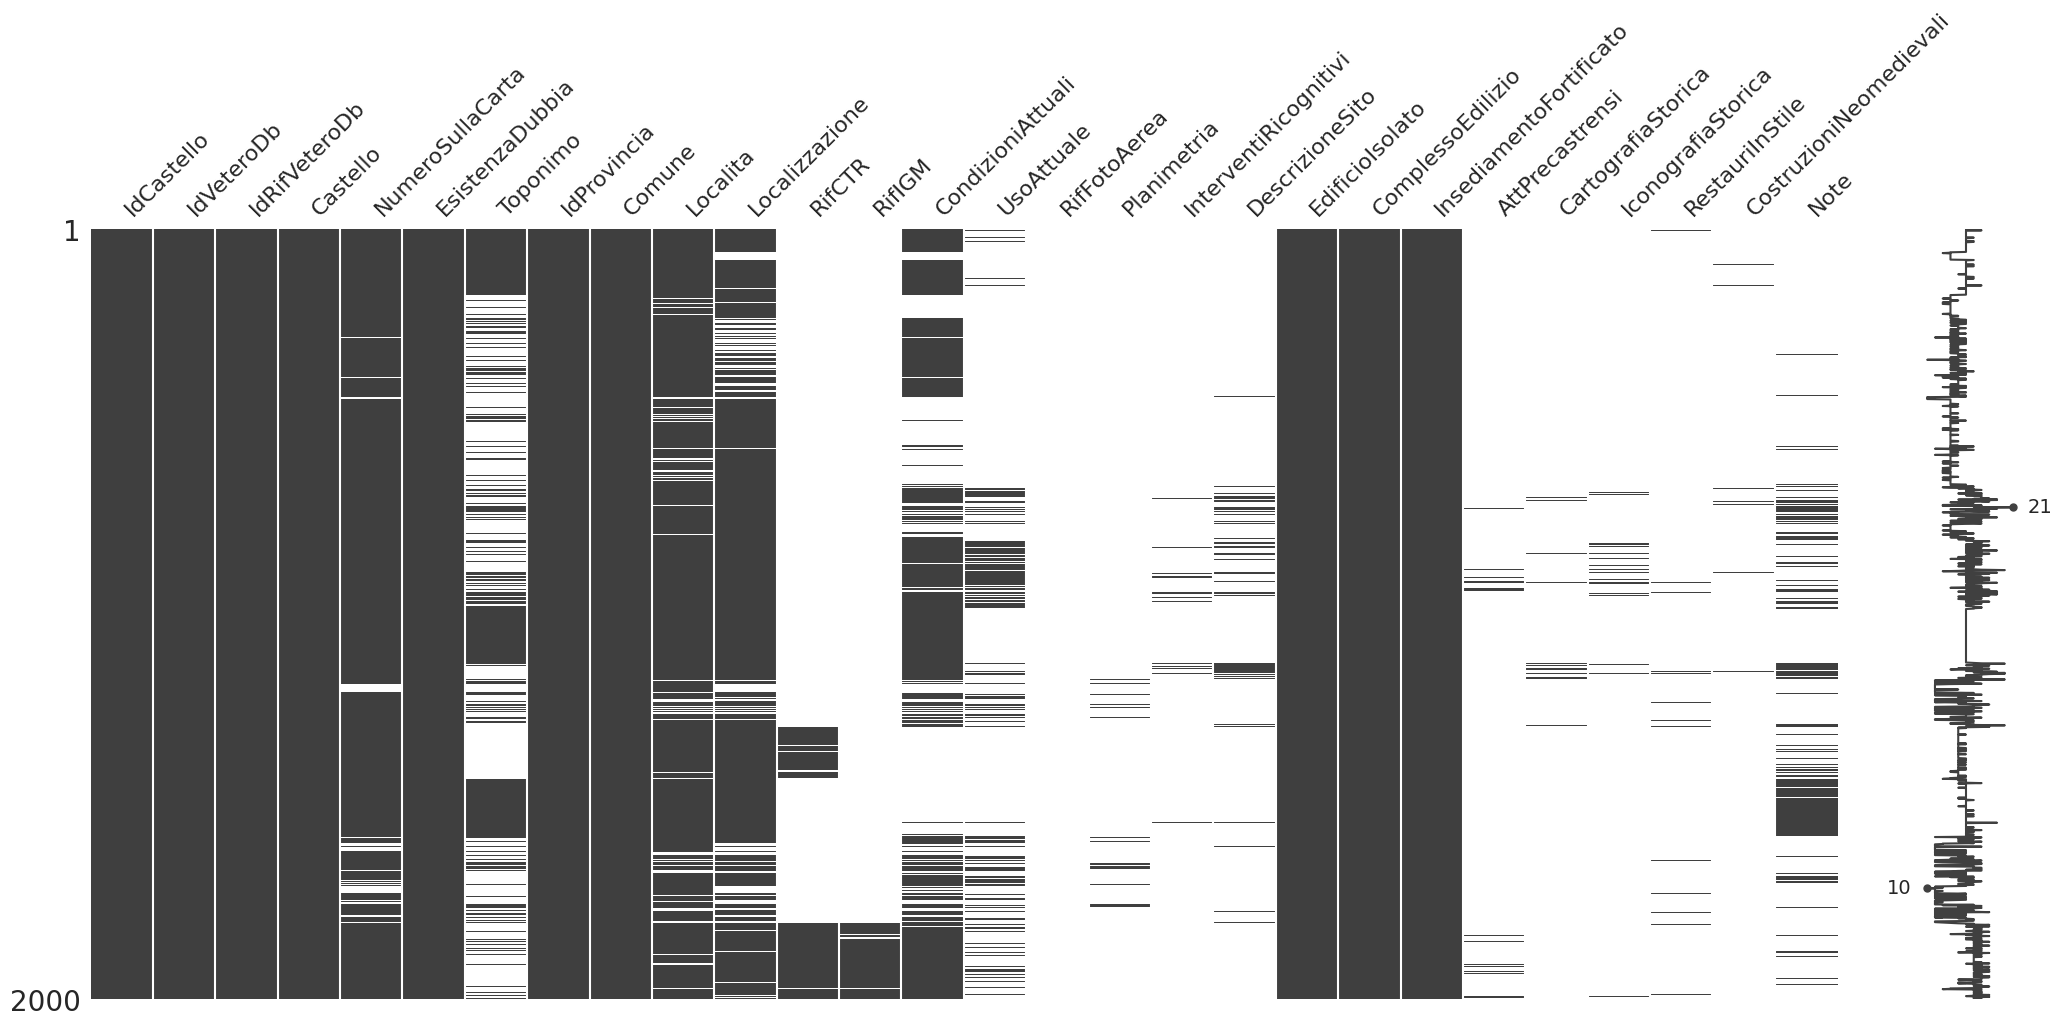

In [12]:
msno.matrix(df)

<Axes: >

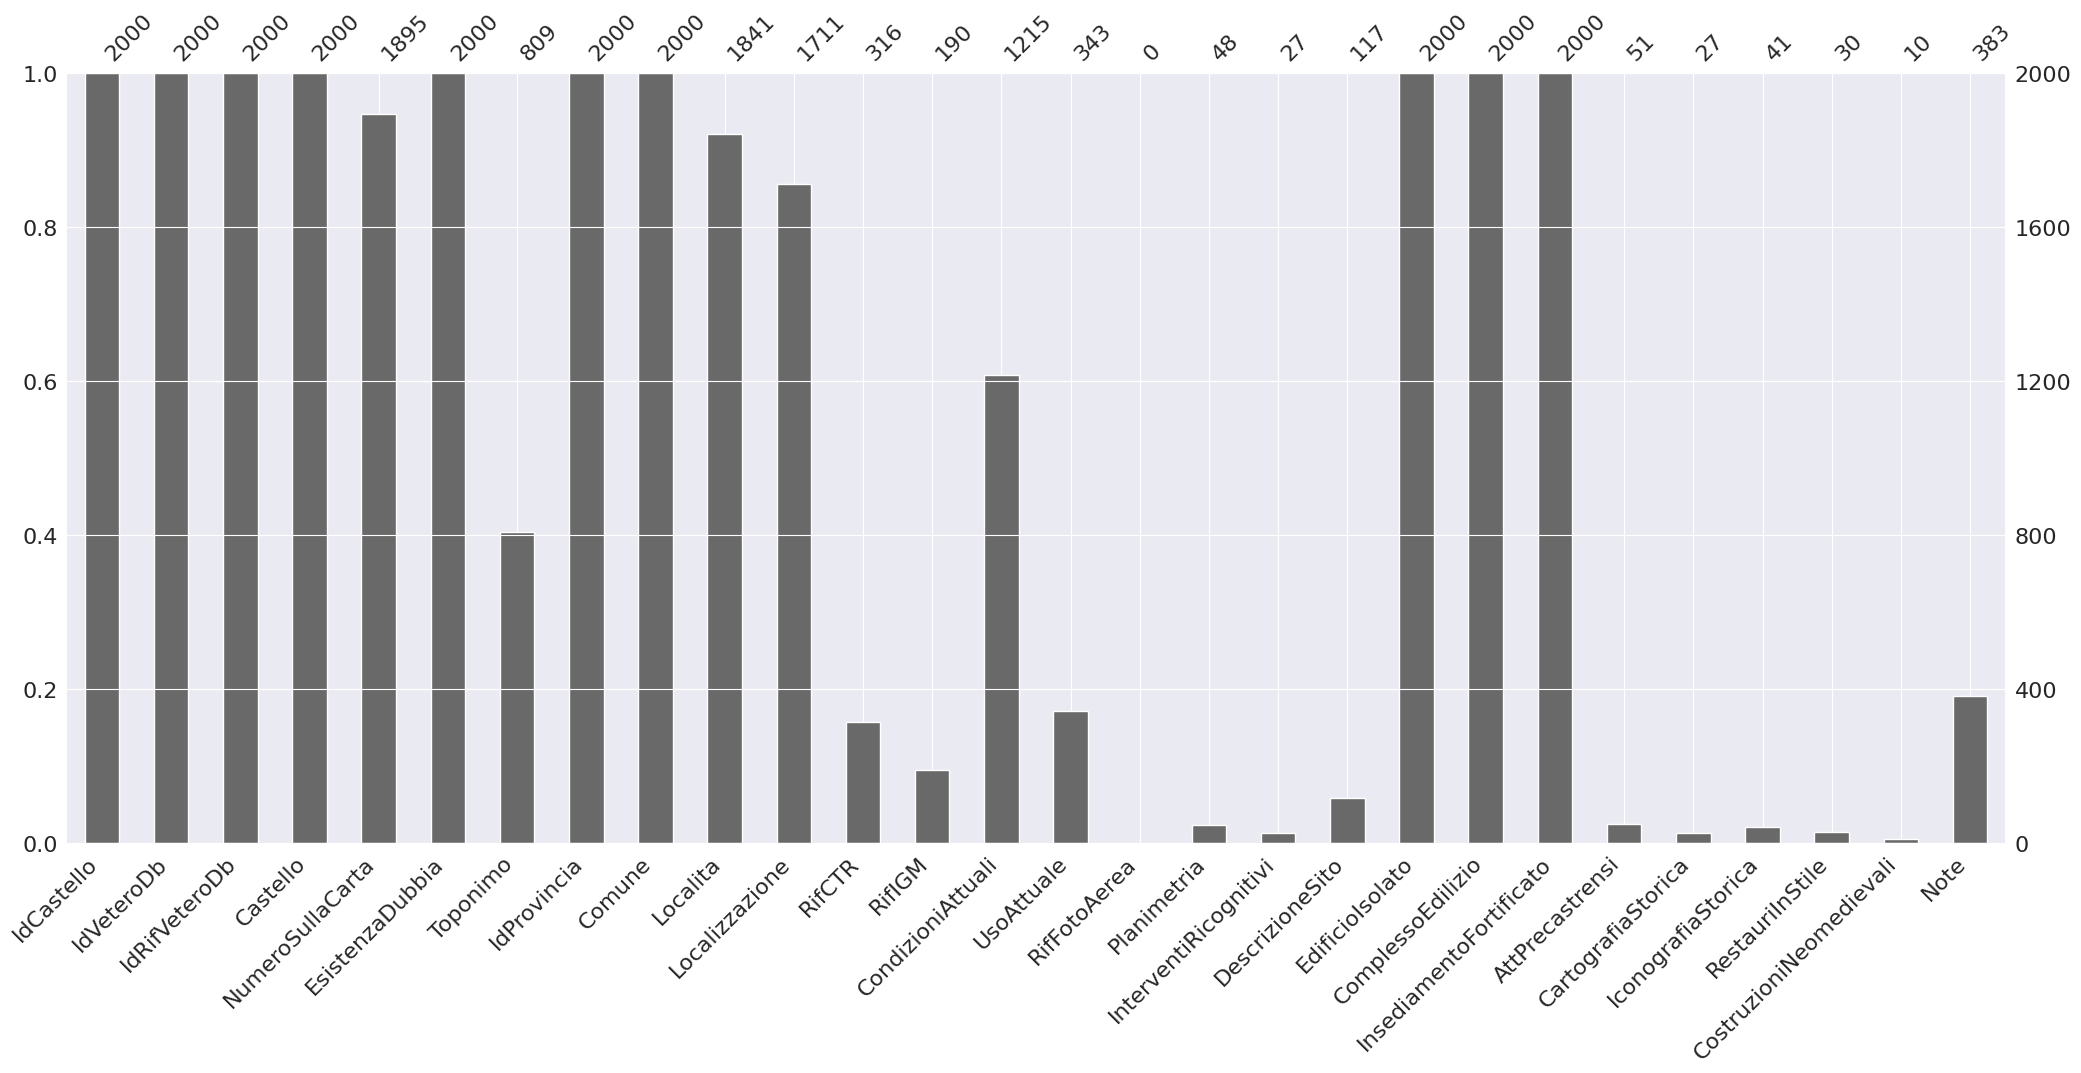

In [13]:
msno.bar(df)

## Detailed analysis per column

### `Castello`

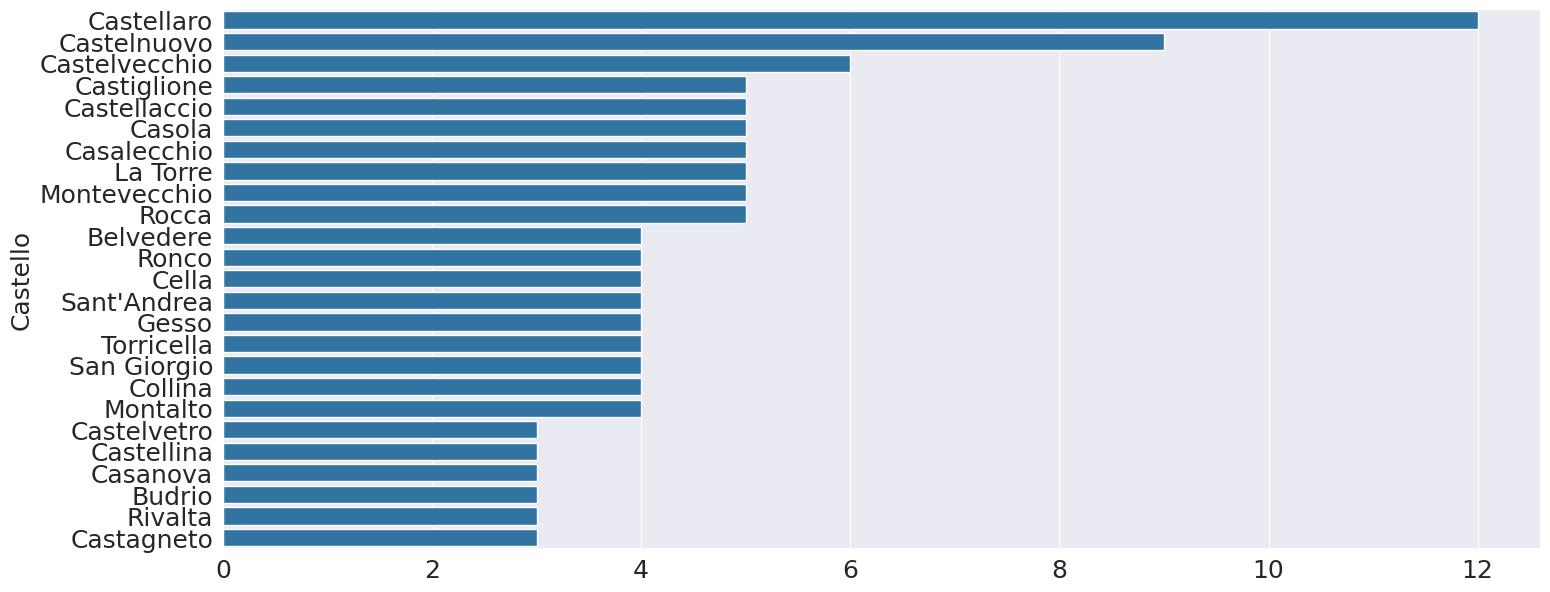

In [14]:
castle_counts = df['Castello'].value_counts().head(25)
sns.barplot(y=castle_counts.index, x=castle_counts.values)
plt.show()

### `EsistenzaDubbia`

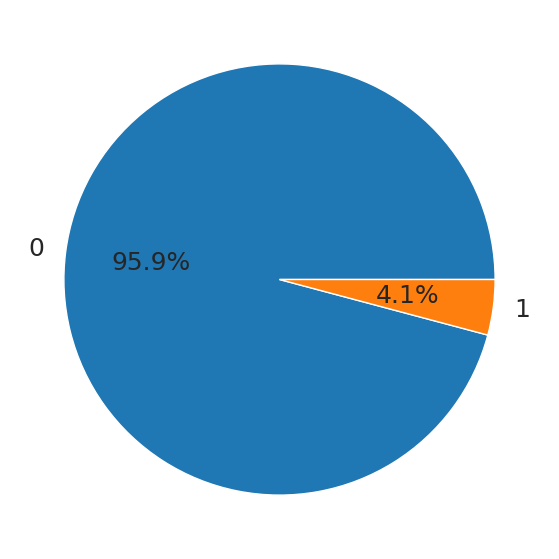

In [15]:
existence_counts = df['EsistenzaDubbia'].value_counts()
plt.pie(existence_counts.values, labels=existence_counts.index, autopct='%1.1f%%')
plt.show()

### `Toponimo`

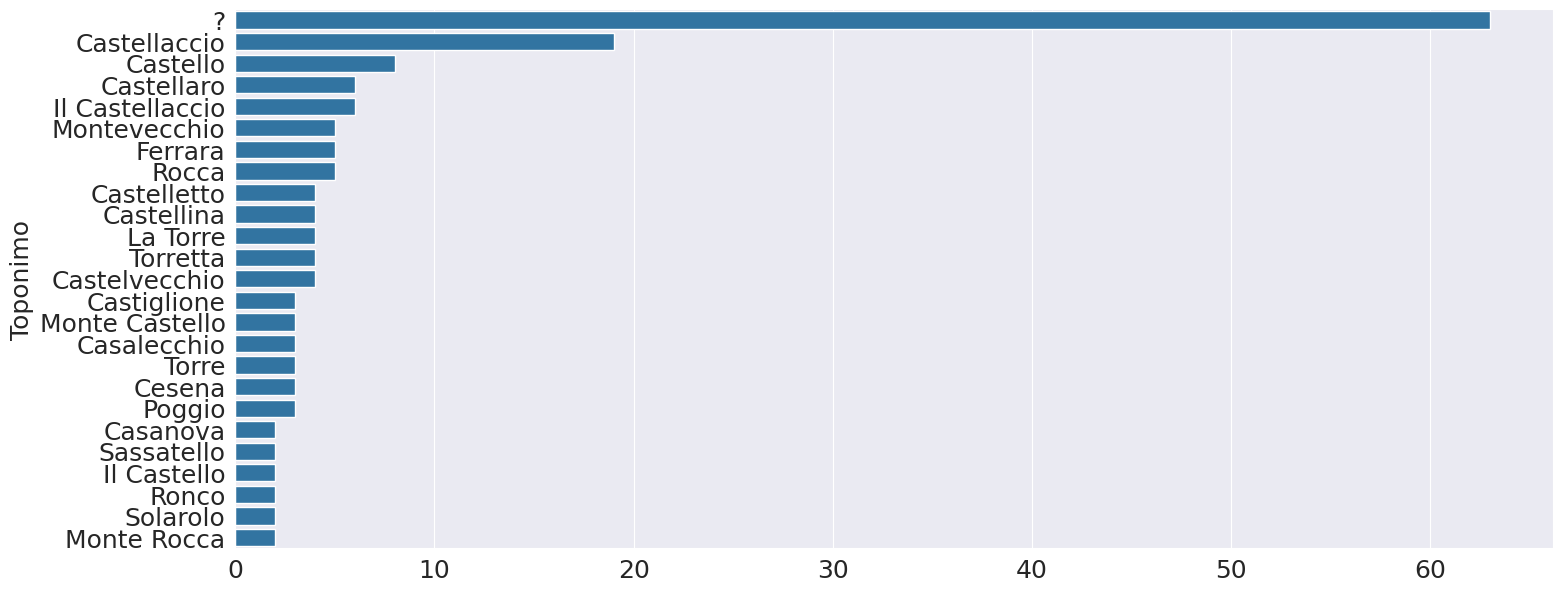

In [16]:
toponym_counts = df['Toponimo'].value_counts().head(25)
sns.barplot(y=toponym_counts.index, x=toponym_counts.values)
plt.show()

### `Comune`

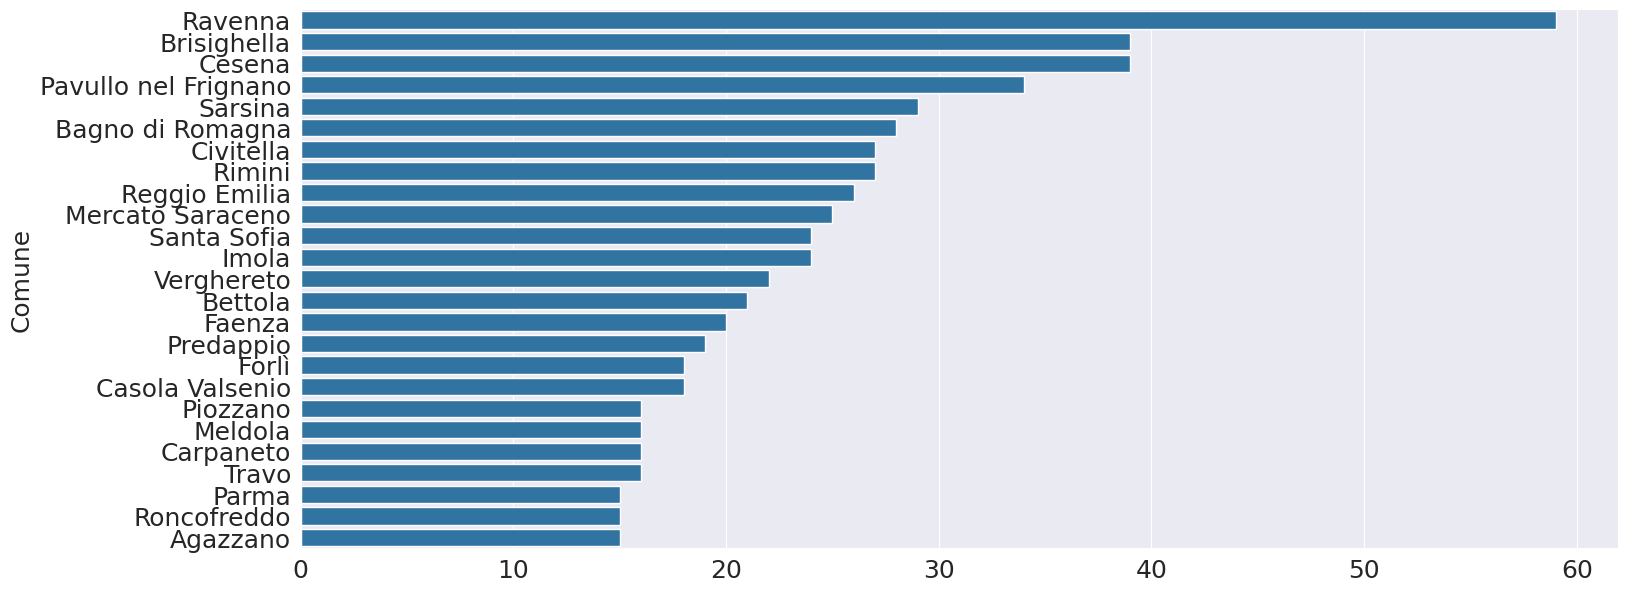

In [17]:
comune_counts = df['Comune'].value_counts().head(25)
sns.barplot(y=comune_counts.index, x=comune_counts.values)
plt.show()

### `Localita`

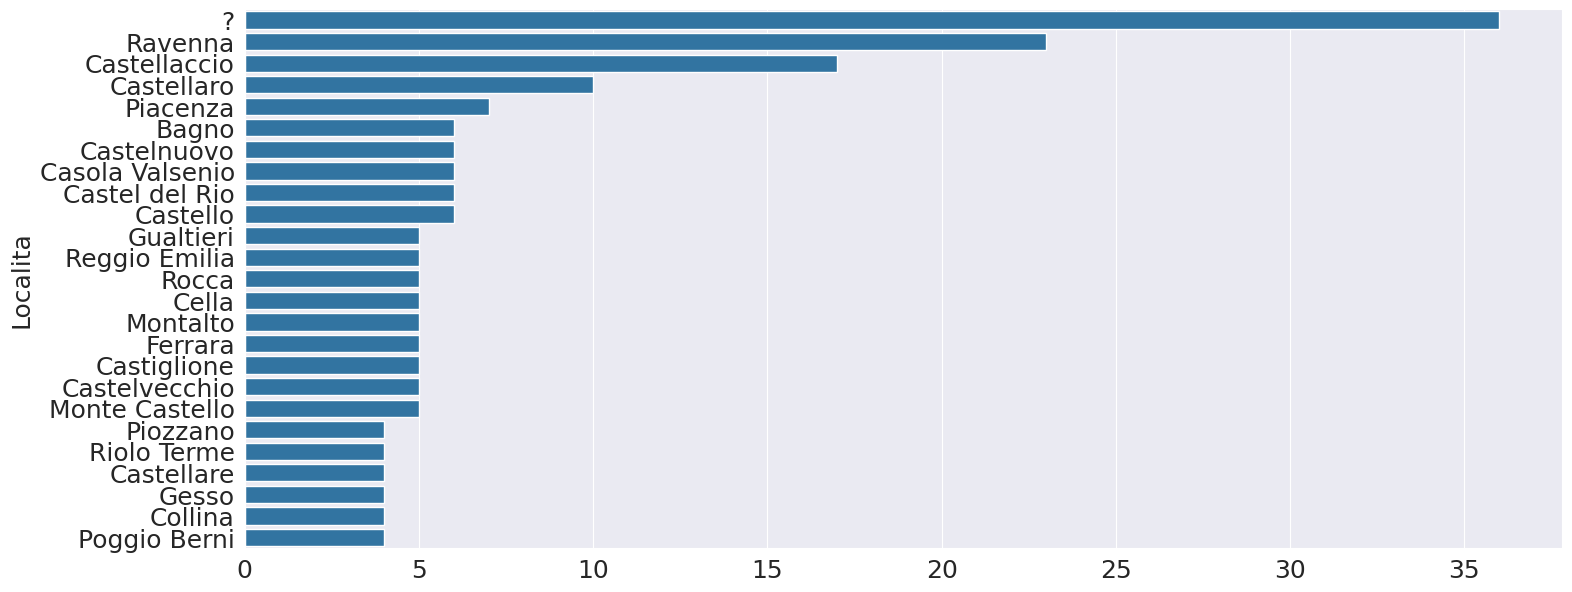

In [18]:
location_counts = df['Localita'].value_counts().head(25)
sns.barplot(y=location_counts.index, x=location_counts.values)
plt.show()

### `Localizzazione`

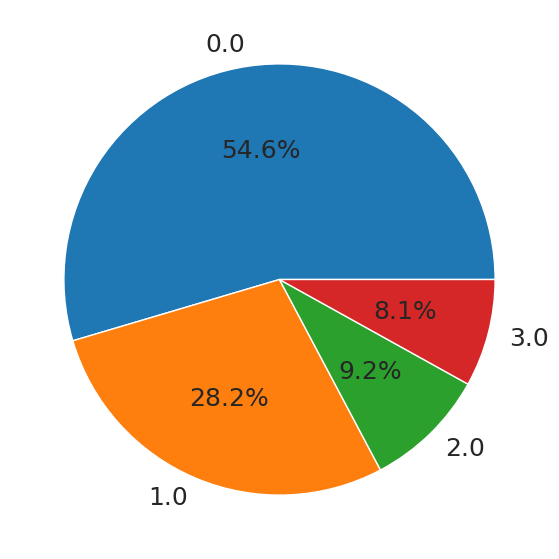

In [19]:
localization_counts = df['Localizzazione'].value_counts()
plt.pie(localization_counts.values, labels=localization_counts.index, autopct='%1.1f%%')
plt.show()

### `RifCTR`

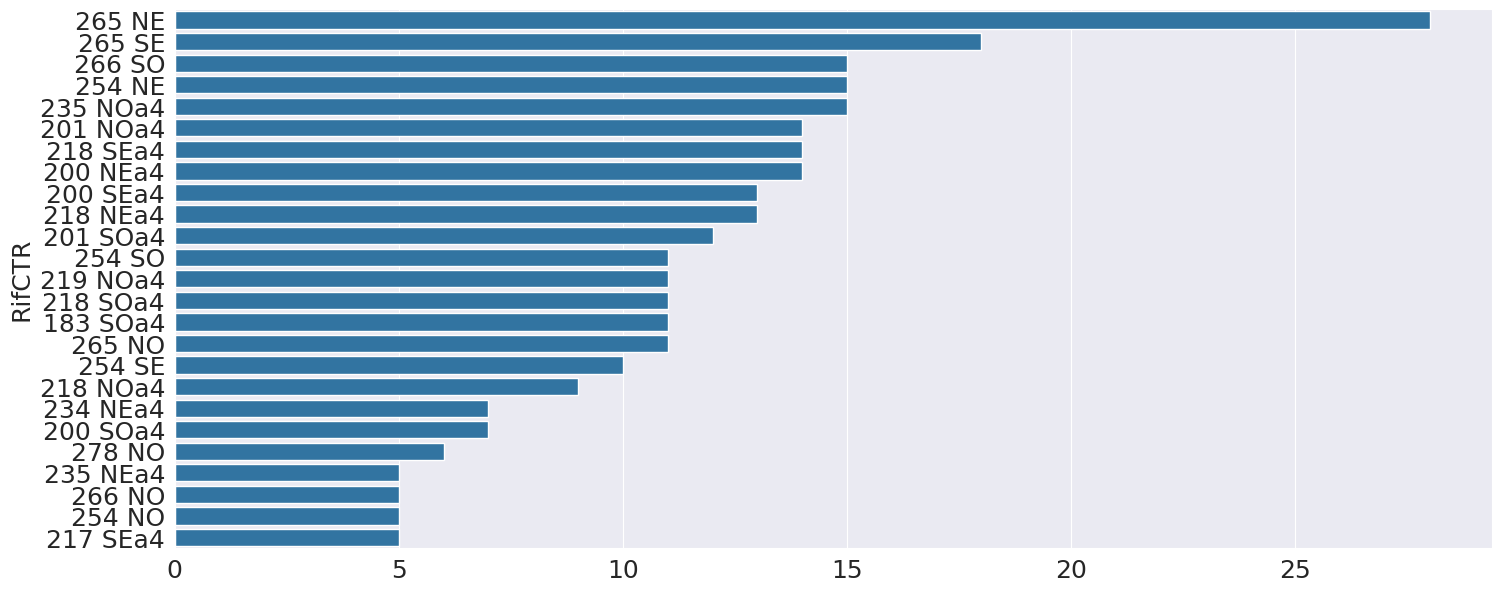

In [20]:
rifctr_counts = df['RifCTR'].value_counts().head(25)
sns.barplot(y=rifctr_counts.index, x=rifctr_counts.values)
plt.show()

### `RifIGM`

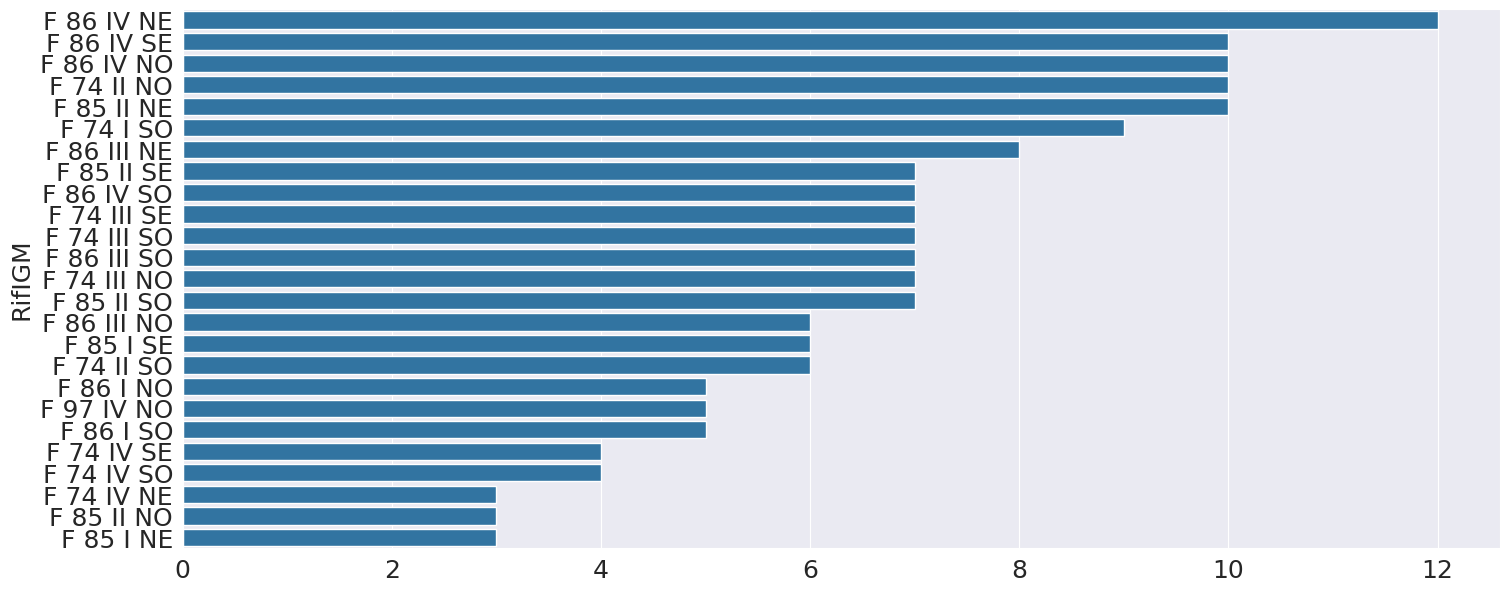

In [21]:
rifigm_counts = df['RifIGM'].value_counts().head(25)
sns.barplot(y=rifigm_counts.index, x=rifigm_counts.values)
plt.show()

### `CondizioniAttuali`

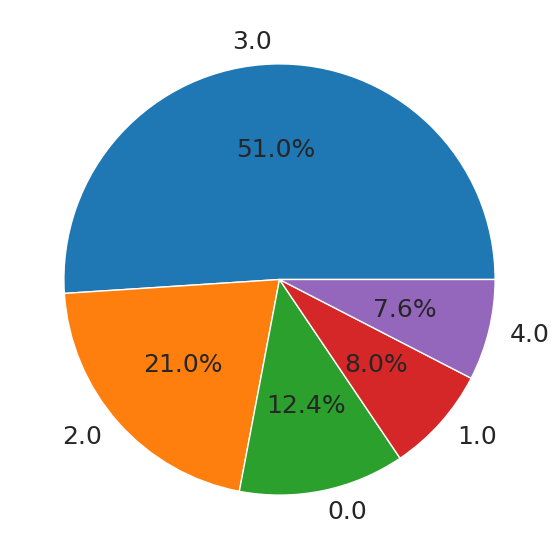

In [22]:
condition_counts = df['CondizioniAttuali'].value_counts()
plt.pie(condition_counts.values, labels=condition_counts.index, autopct='%1.1f%%')
plt.show()

### `EdificioIsolato`

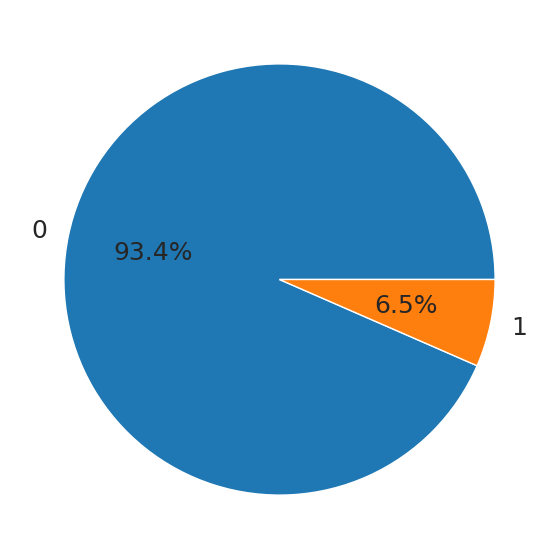

In [23]:
isolated_counts = df['EdificioIsolato'].value_counts()
plt.pie(isolated_counts.values, labels=isolated_counts.index, autopct='%1.1f%%')
plt.show()

### `ComplessoEdilizio`

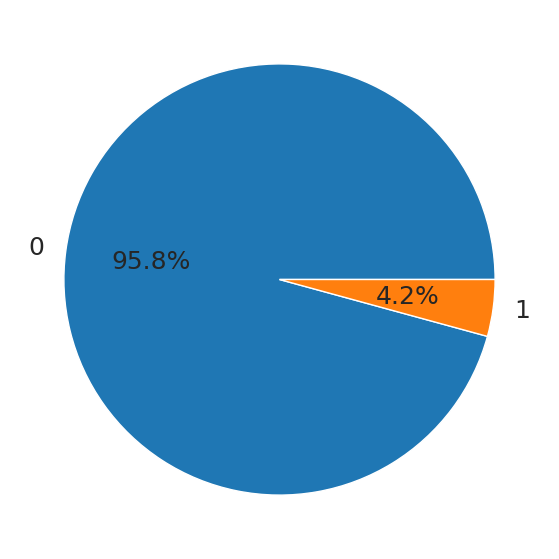

In [24]:
compbuilding_counts = df['ComplessoEdilizio'].value_counts()
plt.pie(compbuilding_counts.values, labels=compbuilding_counts.index, autopct='%1.1f%%')
plt.show()

### `InsediamentoFortificato`

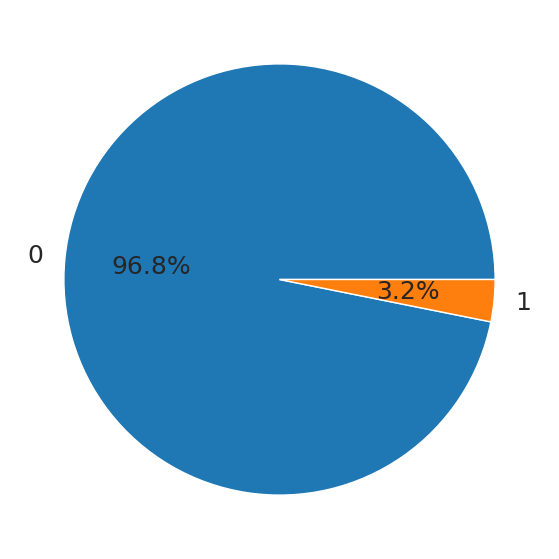

In [25]:
fortified_counts = df['InsediamentoFortificato'].value_counts()
plt.pie(fortified_counts.values, labels=fortified_counts.index, autopct='%1.1f%%')
plt.show()

## Observations

* NULL values should be normalized
* Should `IdVeteroDb` and `IdRifVeteroDb` be dropped?
* What is `Castello`?
* What is `NumeroSullaCarta`?
* What do the categories used in `EsistenzaDubbia` (`0` and `1`) actually mean?
* What is `Toponimo`?
* What do the categories used in `Localizzazione` (`0`, `1`, `2`, `3`) actually mean?
* What is `RifCTR`? (Carta Tecnica regionale? See https://geoportale.regione.emilia-romagna.it/catalogo/dati-cartografici/cartografia-di-base/cartografia-tecnica)
* What is `RifIGM`? (Istituto Geografico Militare? See https://www.igmi.org/it/descrizione-prodotti/cartografia-digitale)
* What do the categories used in `CondizioniAttuali` (`0`, `1`, `2`, `3`, `4`) actually mean?
* What do the categories used in `EdificioIsolato` (`0` and `1`) actually mean?
* What do the categories used in `ComplessoEdilizio` (`0` and `1`) actually mean?
* What do the categories used in `InsediamentoFortificato` (`0` and `1`) actually mean?
* Should `RifFotoAerea` be dropped?
* Should `Planimetria` be dropped?
* Should `InterventiRicognitivi` be dropped?
* Should `DescrizioneSito` be dropped?
* Should `AttiPrecastrensi` be dropped?
* Should `CartografiaStorica` be dropped?
* Should `IconografiaStorica` be dropped?
* Should `RestauriInStile` be dropped?
* Should `CostruzioniNeomedievali` be dropped?